# Consider the credit card dataset which contains the following columns:
- CLIENTNUM: Primary key of the dataset
- Attrition_Flag: Indicates if a customer is retained or attrited
- Customer_Age: Age of the customer
- Gender: Gender of the customer
- Dependent_count: Number of people dependent on the customer
- Education_Level: Highest level of education of the customer
- Income_Category: Range of income of the customer
- Credit_Limit: Credit card limit
- Total_Revolving_Bal: Pending balance of the credit
- Avg_Purchase: Amount of purchase made by the customer on credit card
- Total_Trans_Amt: Total transaction amount


In [2]:
#Importing the necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [3]:
#Importing the required dataset

credit_df = pd.read_csv("CreditCard_DV.csv")
credit_df  #showing a single row in the df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Credit_Limit,Total_Revolving_Bal,Avg_Purchase,Total_Trans_Amt
0,768805383,Existing Customer,45,M,3,High School,$60K - $80K,12691.0,777,11914.0,1144
1,818770008,Existing Customer,49,F,5,Graduate,Less than $40K,8256.0,864,7392.0,1291
2,713982108,Existing Customer,51,M,3,Graduate,$80K - $120K,3418.0,0,3418.0,1887
3,769911858,Existing Customer,40,F,4,High School,Less than $40K,3313.0,2517,796.0,1171
4,709106358,Existing Customer,40,M,3,Uneducated,$60K - $80K,4716.0,0,4716.0,816
...,...,...,...,...,...,...,...,...,...,...,...
95,719712633,Existing Customer,64,M,1,Graduate,Less than $40K,1709.0,895,814.0,1673
96,772629333,Existing Customer,45,M,3,Graduate,$40K - $60K,3454.0,1200,2254.0,1313
97,720336708,Existing Customer,53,M,3,Doctorate,$40K - $60K,3789.0,1706,2083.0,1609
98,802013583,Existing Customer,56,M,3,College,$120K +,9689.0,2250,7439.0,1158


# Create a bivariate plot to find if there is a correlation between credit card limit and average purchase made on the card.

Text(0.5, 1.0, 'Credit_Limit vs Avg_Purchase')

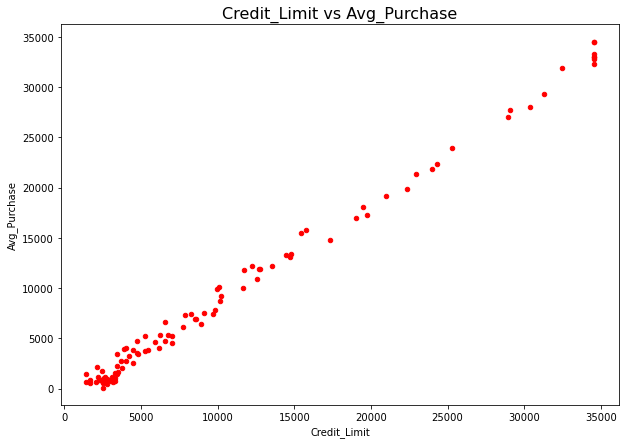

In [4]:
#To Plot the data as a scatter plot

ax = credit_df.plot("Credit_Limit","Avg_Purchase",kind="scatter", color = "red",marker = "o",figsize=(10,7))

#To add labels and title to the output

ax.set_xlabel("Credit_Limit")	#sets label for x-axis
ax.set_ylabel("Avg_Purchase")	#sets label for y-axis
ax.set_title("Credit_Limit vs Avg_Purchase",fontsize=16)	#sets title for the graph

# Visualise the distribution of values for credit card limit and average purchase made on the card. Also, identify the outliers in the data, if any. 

In [5]:
credit_df["Credit_Limit"].describe()

count      100.000000
mean     10881.756000
std      10056.333148
min       1438.300000
25%       3309.250000
50%       6666.000000
75%      14746.500000
max      34516.000000
Name: Credit_Limit, dtype: float64

Text(0.5, 1.0, 'Credit limit title')

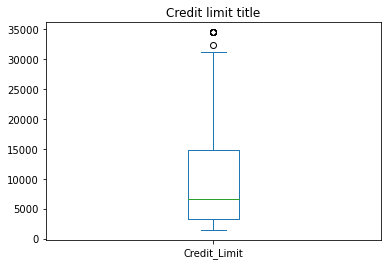

In [6]:
ax = credit_df["Credit_Limit"].plot(kind="box")
ax.set_title("Credit limit title")


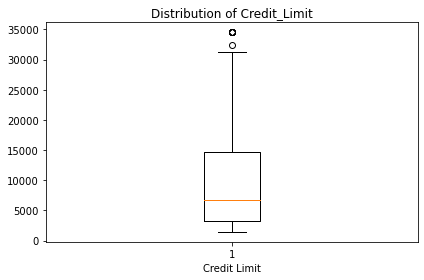

In [7]:
fig, ax1 = plt.subplots(1, 1)

#The following lines of code change the alignment from vertical to horizontal
ax1.boxplot(credit_df["Credit_Limit"])

#The following lines of code are used to add labels to axes and title to the graph

ax1.set_title('Distribution of Credit_Limit')
ax1.set_xlabel('Credit Limit')



#In case of any superimposition of the subplots, the following functions caters the aesthetics
fig.tight_layout()

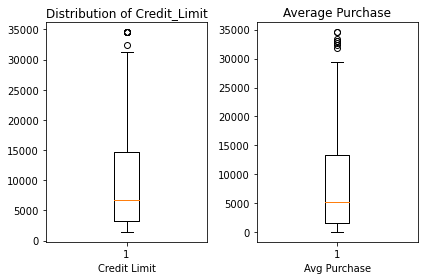

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2)

#The following lines of code change the alignment from vertical to horizontal
ax1.boxplot(credit_df["Credit_Limit"])
ax2.boxplot(credit_df["Avg_Purchase"])

#The following lines of code are used to add labels to axes and title to the graph

ax1.set_title('Distribution of Credit_Limit')
ax1.set_xlabel('Credit Limit')

ax2.set_title('Average Purchase')
ax2.set_xlabel("Avg Purchase")

#In case of any superimposition of the subplots, the following functions caters the aesthetics
fig.tight_layout()

In [9]:
cr_limit_arr = credit_df["Credit_Limit"]
# finding the 1st quartile
q1 = np.quantile(cr_limit_arr, 0.25)

# finding the 3rd quartile
q3 = np.quantile(cr_limit_arr, 0.75)
med = np.median(cr_limit_arr)

# finding the iqr region
iqr = q3-q1

# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print("IQR:",iqr)
print("upper_bound:",upper_bound)
print("lower_bound:",lower_bound)

IQR: 11437.25
upper_bound: 31902.375
lower_bound: -13846.625


In [10]:
outliers = cr_limit_arr[(cr_limit_arr <= lower_bound) | (cr_limit_arr >= upper_bound)]
print('The following are the outliers in the boxplot of Credit Limit:\n',outliers)

The following are the outliers in the boxplot of Credit Limit:
 6     34516.0
40    32426.0
45    34516.0
61    34516.0
65    34516.0
70    34516.0
81    34516.0
84    34516.0
Name: Credit_Limit, dtype: float64


In [11]:
x = credit_df['Credit_Limit']
v = x[(x == 34516)]
v

6     34516.0
45    34516.0
61    34516.0
65    34516.0
70    34516.0
81    34516.0
84    34516.0
Name: Credit_Limit, dtype: float64

In [12]:
avg_purchase = credit_df["Avg_Purchase"]
# finding the 1st quartile
q1 = np.quantile(avg_purchase, 0.25)

# finding the 3rd quartile
q3 = np.quantile(avg_purchase, 0.75)
med = np.median(avg_purchase)

# finding the iqr region
iqr = q3-q1

# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print("IQR:",iqr)
print("upper_bound:",upper_bound)
print("lower_bound:",lower_bound)

IQR: 11790.425
upper_bound: 31022.887499999997
lower_bound: -16138.812499999996


In [13]:
outliers = avg_purchase[(avg_purchase <= lower_bound) | (avg_purchase >= upper_bound)]
print('The following are the outliers in the boxplot of Average Purchase:\n',outliers)

The following are the outliers in the boxplot of Average Purchase:
 6     32252.0
40    31848.0
45    34516.0
61    34516.0
65    33001.0
70    32753.0
81    32983.0
84    33297.0
Name: Avg_Purchase, dtype: float64


# Provide a visual representation of the number of customers in each income group using a bar chart.

In [14]:
categories = credit_df["Income_Category"].unique()
categories

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [15]:
count_df = pd.DataFrame(credit_df[["Income_Category"]].groupby(by= "Income_Category").size().reset_index())
count_df.columns = [["Income_Category","Count"]]
count_df

,Income_Category,Count
0,$120K +,11
1,$40K - $60K,15
2,$60K - $80K,22
3,$80K - $120K,23
4,Less than $40K,22
5,Unknown,7


In [16]:
count_df.set_index('Income_Category', inplace = True)
count_df

,Count
Income_Category,
"($120K +,)",11
"($40K - $60K,)",15
"($60K - $80K,)",22
"($80K - $120K,)",23
"(Less than $40K,)",22
"(Unknown,)",7


Text(0, 0.5, 'Count')

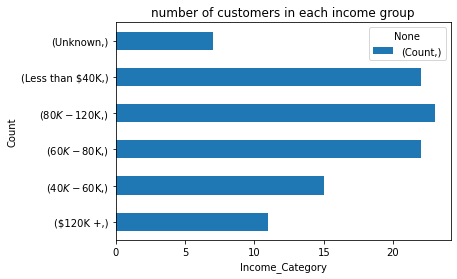

In [17]:
count_df['Count'].plot(kind="barh")
plt.title("number of customers in each income group")
plt.xlabel("Income_Category")
plt.ylabel("Count")

# Plot the frequency distribution of the total transaction amount.

In [18]:
credit_df["Total_Trans_Amt"].min()

602

In [19]:
credit_df["Total_Trans_Amt"].max()

2339

In [20]:
credit_df["Total_Trans_Amt"].max() - credit_df["Total_Trans_Amt"].min()

1737

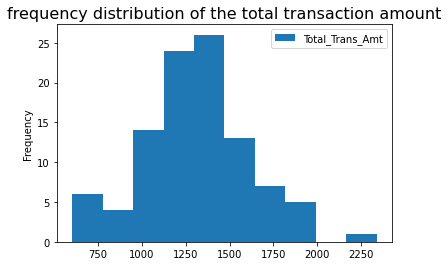

In [21]:
credit_df["Total_Trans_Amt"].plot(kind="hist")
plt.title("frequency distribution of the total transaction amount", fontsize=16)
plt.legend()

# Graphically represent the percentage of customers retained and those attrited. Highlight the latter by slicing it apart from the main pie

In [22]:
Attrition_df= pd.DataFrame(credit_df[["Attrition_Flag"]].groupby(by= ["Attrition_Flag"]).size().reset_index())
Attrition_df.columns = [["Attrition_Flag","Count"]]
Attrition_df

,Attrition_Flag,Count
0,Attrited Customer,7
1,Existing Customer,93


In [23]:
Attrition_df.set_index('Attrition_Flag', inplace = True)
Attrition_df

,Count
Attrition_Flag,
"(Attrited Customer,)",7
"(Existing Customer,)",93


<AxesSubplot:ylabel='(Count,)'>

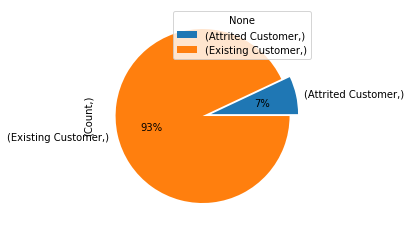

In [24]:
explode = (0.05, 0.05)
Attrition_df.plot(kind='pie', y='Count', autopct='%1.0f%%',explode=explode)

# Consider the Cars93 dataset which contains the following columns:
Manufacturer	
Model	
Type	
Price		
MPG.city	
MPG.highway	
Cylinders	
EngineSize	
Horsepower	etc


In [25]:
#Importing the required dataset

cars_df = pd.read_csv("Cars93.csv")
columns = ["Manufacturer","Model","Type","Price","MPG.city","MPG.highway","Horsepower","Rear.seat.room","Passengers"]
cars_df[columns].head()

,Manufacturer,Model,Type,Price,MPG.city,MPG.highway,Horsepower,Rear.seat.room,Passengers
0,Acura,Integra,Small,15.9,25,31,140,26.5,5
1,Acura,Legend,Midsize,33.9,18,25,200,30.0,5
2,Audi,90,Compact,29.1,20,26,172,28.0,5
3,Audi,100,Midsize,37.7,19,26,172,31.0,6
4,BMW,535i,Midsize,30.0,22,30,208,27.0,4


# Visualize the spread of data for the 'Price' column

<AxesSubplot:>

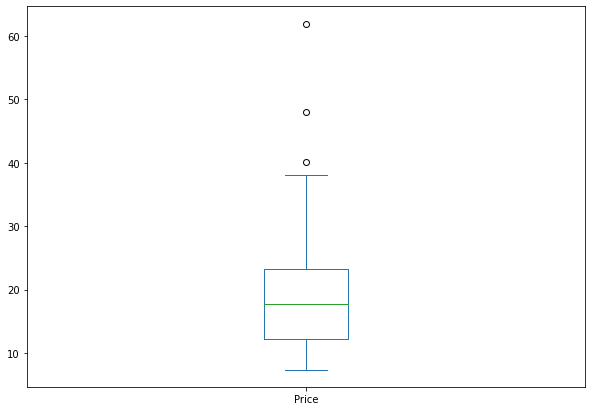

In [26]:
cars_df["Price"].plot(kind="box",figsize = (10,7))

# Visualize the distribution of price for compact and large type of cars

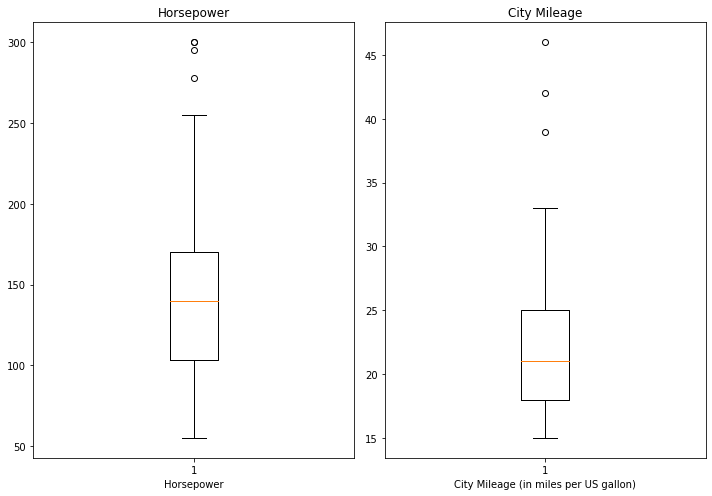

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(10)
fig.set_figheight(7)

#The following lines of code change the alignment from vertical to horizontal

ax1.boxplot(cars_df["Horsepower"])
ax2.boxplot(cars_df["MPG.city"])

#The following lines of code are used to add labels to axes and title to the graph

ax1.set_title('Horsepower')
ax1.set_xlabel('Horsepower')
ax2.set_title('City Mileage')
ax2.set_xlabel("City Mileage (in miles per US gallon)")
#In case of any superimposition of the subplots, the following functions caters the aesthetics

fig.tight_layout()

# Visualize the distribution of price for each type of car

Text(0.5, 1.0, 'Van')

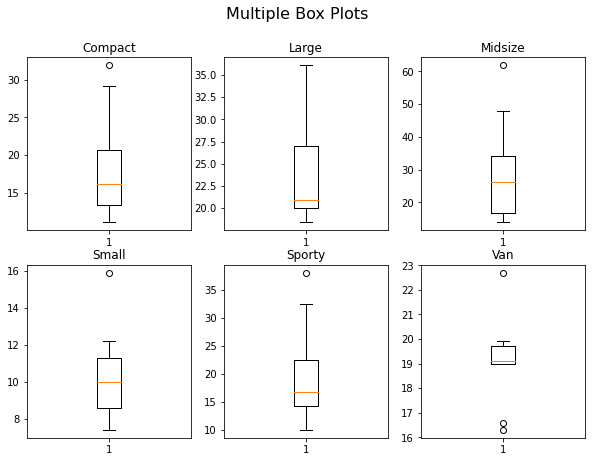

In [28]:
fig, ax = plt.subplots(2, 3)
fig.set_figwidth(10)
fig.set_figheight(7)
fig.suptitle("Multiple Box Plots", fontsize=16)

ax[0][0].boxplot(cars_df["Price"][cars_df["Type"]=="Compact"])
ax[0][0].set_title('Compact')

ax[0][1].boxplot(cars_df["Price"][cars_df["Type"]=="Large"])
ax[0][1].set_title('Large')

ax[0][2].boxplot(cars_df["Price"][cars_df["Type"]=="Midsize"])
ax[0][2].set_title('Midsize')

ax[1][0].boxplot(cars_df["Price"][cars_df["Type"]=="Small"])
ax[1][0].set_title('Small')

ax[1][1].boxplot(cars_df["Price"][cars_df["Type"]=="Sporty"])
ax[1][1].set_title('Sporty')

ax[1][2].boxplot(cars_df["Price"][cars_df["Type"]=="Van"])
ax[1][2].set_title('Van')

# Visualize the correlation between Horsepower and Mileage in the city

Text(0.5, 1.0, 'Horsepower vs MPG.city')

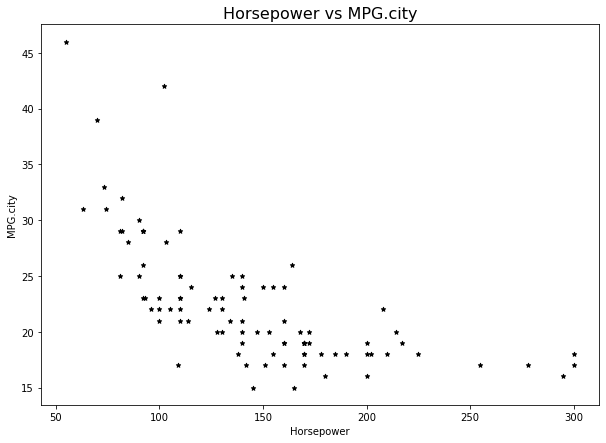

In [29]:
ax = cars_df.plot(["Horsepower"],["MPG.city"],kind="scatter", color = "black",marker = "*",figsize=(10,7))

#To add labels and title to the output

ax.set_xlabel("Horsepower")	#sets label for x-axis
ax.set_ylabel("MPG.city")	#sets label for y-axis
ax.set_title("Horsepower vs MPG.city",fontsize=16)	#sets title for the graph

# Visualize the correlation between Horsepower and Mileage in the city for each type of car

['Small' 'Midsize' 'Compact' 'Large' 'Sporty' 'Van']


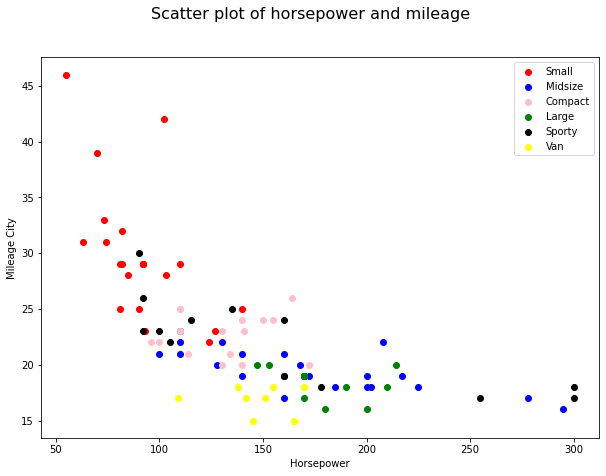

In [30]:
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(7)

car_type_list = cars_df["Type"].unique()
print(car_type_list)
colors_list = ['red','blue','pink','green','black','yellow']  

for car_type,colr in zip(car_type_list,colors_list): 	# for every car type in the car_type_list we plot all the points in the scatter plot
    x = cars_df[cars_df["Type"] == car_type]["Horsepower"]
    y = cars_df[cars_df["Type"] == car_type]["MPG.city"]
    plt.scatter(x,y,color = colr,label=car_type)

plt.suptitle("Scatter plot of horsepower and mileage",fontsize=16)
plt.xlabel("Horsepower")
plt.ylabel("Mileage City")
plt.legend()

# Visualize and compare Mileage in the city for each type of DriveTrain using a bar chart

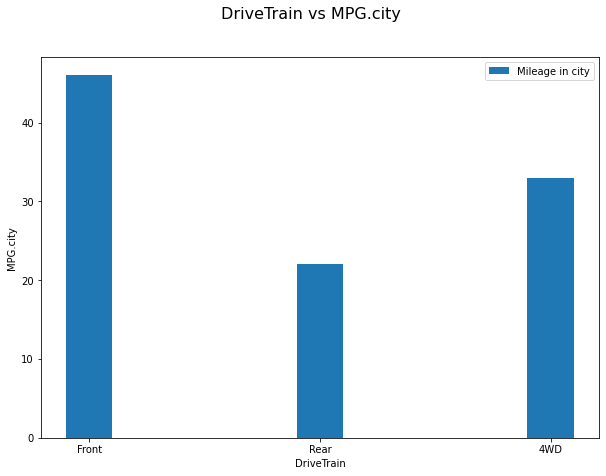

In [31]:
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(7)
plt.bar(cars_df["DriveTrain"], cars_df["MPG.city"],width=0.2,label="Mileage in city")
plt.suptitle("DriveTrain vs MPG.city",fontsize=16)
plt.xlabel("DriveTrain")
plt.ylabel("MPG.city")
plt.legend()

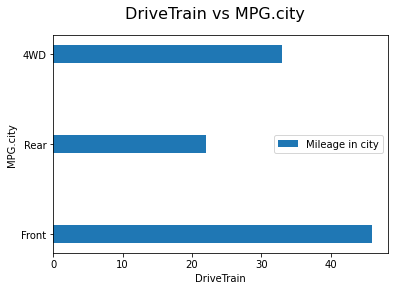

In [33]:
plt.barh(cars_df["DriveTrain"], cars_df["MPG.city"],height=0.2,label="Mileage in city")
plt.suptitle("DriveTrain vs MPG.city",fontsize=16)
plt.xlabel("DriveTrain")
plt.ylabel("MPG.city")
plt.legend()

# Visualize the relationship between "No of Passengers" for each "type of car" using a stacked bar chart

In [34]:
#Use the following code snippet to filter the unique values of no. of passengers a car can carry
cars_df["Passengers"].unique()


array([5, 6, 4, 7, 8, 2], dtype=int64)

In [35]:
#Use the following code snippet to filter the unique values of Types of car.
cars_df["Type"].unique()


array(['Small', 'Midsize', 'Compact', 'Large', 'Sporty', 'Van'],
      dtype=object)

In [38]:
grouped_data = cars_df[["Passengers","Type"]].groupby(by= ["Passengers","Type"]).size()
grouped_data

Passengers  Type   
2           Sporty      2
4           Compact     1
            Midsize     2
            Small       8
            Sporty     12
5           Compact    13
            Midsize    15
            Small      13
6           Compact     2
            Large      11
            Midsize     5
7           Van         8
8           Van         1
dtype: int64

In [39]:
grouped_data = cars_df[["Passengers","Type"]].groupby(by= ["Passengers","Type"]).size().unstack()
grouped_data

Type,Compact,Large,Midsize,Small,Sporty,Van
Passengers,,,,,,
2,NaN,NaN,NaN,NaN,2.0,NaN
4,1.0,NaN,2.0,8.0,12.0,NaN
5,13.0,NaN,15.0,13.0,NaN,NaN
6,2.0,11.0,5.0,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,8.0
8,NaN,NaN,NaN,NaN,NaN,1.0


In [40]:
#combining the above 2 steps
grouped_data = cars_df[["Passengers","Type"]].groupby(by= ["Passengers","Type"]).size().unstack().reset_index()
grouped_data

Type,Passengers,Compact,Large,Midsize,Small,Sporty,Van
0,2,NaN,NaN,NaN,NaN,2.0,NaN
1,4,1.0,NaN,2.0,8.0,12.0,NaN
2,5,13.0,NaN,15.0,13.0,NaN,NaN
3,6,2.0,11.0,5.0,NaN,NaN,NaN
4,7,NaN,NaN,NaN,NaN,NaN,8.0
5,8,NaN,NaN,NaN,NaN,NaN,1.0


<AxesSubplot:xlabel='Passengers'>

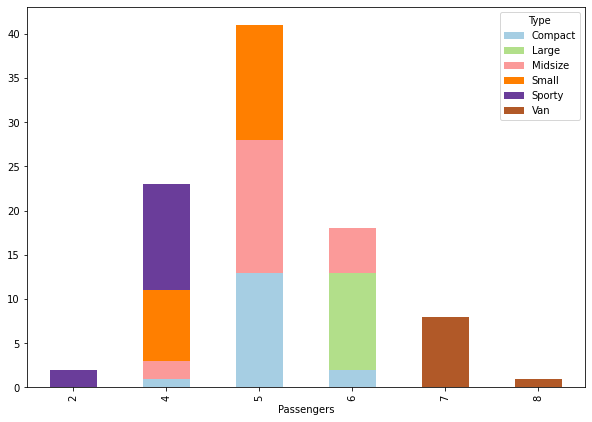

In [43]:
#Stacked Bar Graph can be plotted using the grouped data, as follows:
grouped_data.plot(x="Passengers",kind="bar",stacked=True,colormap=cm.Paired,figsize=(10,7))
#Matplotlib has built-in colormaps. Here, 'Paired' is used.

# mtcars.csv dataset

In [4]:
mtcar_df = pd.read_csv("mtcars.csv")
mtcar_df

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


0    19
1    13
Name: am, dtype: int64


Text(0, 0.5, 'Count')

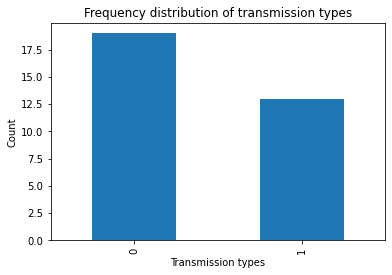

In [16]:
temp= mtcar_df['am'].value_counts()
print(temp)
temp.plot.bar()
plt.title("Frequency distribution of transmission types")
plt.xlabel("Transmission types")
plt.ylabel("Count")